# Machine Learning Project: NYC Temps
**Author:** Frank Scarpa  
Link to GitHub: https://github.com/bankoscarpa/datafun-07-ml 

Imports

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Part 1 - Chart a Straight Line


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11
)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print(f"Coefficient: {linear_regression.coef_[0]:.5f}")
print(f"Intercept: {linear_regression.intercept_:.2f}")


Coefficient: 0.01939
Intercept: -0.31


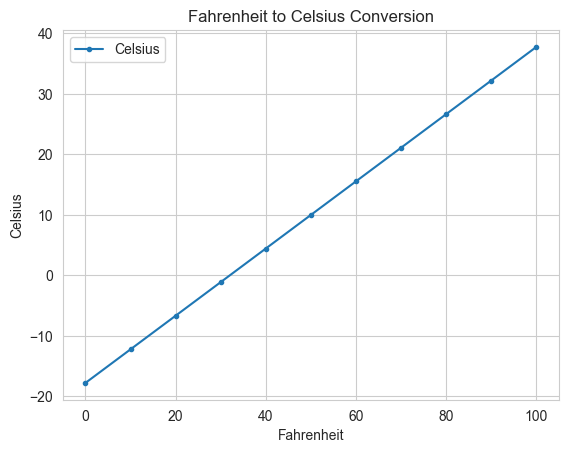

In [76]:
# Define a conversion function from Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Create a list of tuples for Fahrenheit and Celsius values
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create a pandas DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot the data
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-', title='Fahrenheit to Celsius Conversion')

# Label the y-axis
axes.set_ylabel('Celsius')

# Display the plot
plt.show()



## Part 2 - Prediction
### Section 1 - Data Acquisition


In [77]:
nyc_df = pd.read_csv('IntroToPython/examples/ch10/ave_hi_nyc_jan_1895-2018.csv')
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)


### Section 2 - Data Inspection


In [78]:
nyc_df.head()
nyc_df.tail()

,Date,Temperature,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


### Section 3 - Data Cleaning


In [79]:
# Columns renamed and Date floordiv already done
nyc_df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics


In [80]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model


In [81]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
slope = linear_regression.slope
intercept = linear_regression.intercept
# Display SciPy regression parameters
print(f"Slope: {slope:.5f}")
print(f"Intercept: {intercept:.2f}")


Slope: 0.01477
Intercept: 8.69


### Section 6 - Predict


In [82]:
# Predict future temperature using SciPy slope and intercept
pred_2024_scipy = slope * 2024 + intercept

# Display clearly
print(f"Predicted average high in Jan 2024 (SciPy model): {pred_2024_scipy:.2f}°F")

Predicted average high in Jan 2024 (SciPy model): 38.59°F


### Section 7 - Visualization


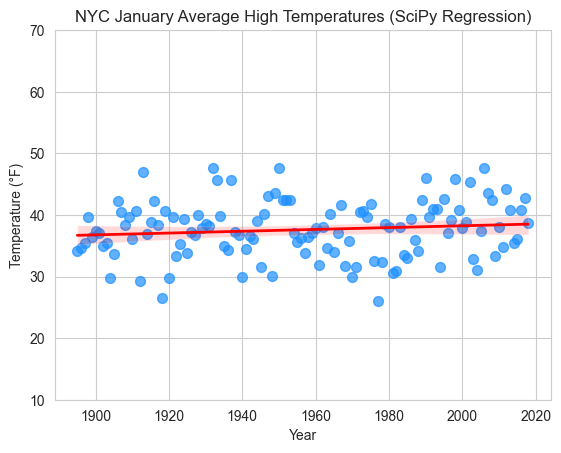

In [83]:
sns.set_style('whitegrid')

# Create a scatter plot with regression line
axes = sns.regplot(
    x=nyc_df.Date, 
    y=nyc_df.Temperature,
    scatter_kws={'color': 'dodgerblue', 's': 50, 'alpha': 0.7},  # points: blue, slightly transparent
    line_kws={'color': 'red', 'linewidth': 2}  # regression line: red
)

# Set plot limits, labels, and title
axes.set_ylim(10, 70)
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (°F)')
axes.set_title('NYC January Average High Temperatures (SciPy Regression)')

# Show the plot
plt.show()


## Part 3 - Prediction (scikit-learn)
### Section 1 - Build the Model


In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11
)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print(f"Coefficient: {linear_regression.coef_[0]:.5f}")
print(f"Intercept: {linear_regression.intercept_:.2f}")


Coefficient: 0.01939
Intercept: -0.31


### Section 2 - Test the Model


In [85]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict


In [86]:
# Predict past (1890) and future (2024) temperatures
pred_1890 = linear_regression.coef_ * 1890 + linear_regression.intercept_
pred_2024 = linear_regression.coef_ * 2024 + linear_regression.intercept_

# Display predictions clearly
print(f"Predicted average high in Jan 1890: {pred_1890[0]:.2f}°F")
print(f"Predicted average high in Jan 2024: {pred_2024[0]:.2f}°F")

Predicted average high in Jan 1890: 36.34°F
Predicted average high in Jan 2024: 38.94°F


### Section 4 - Visualization


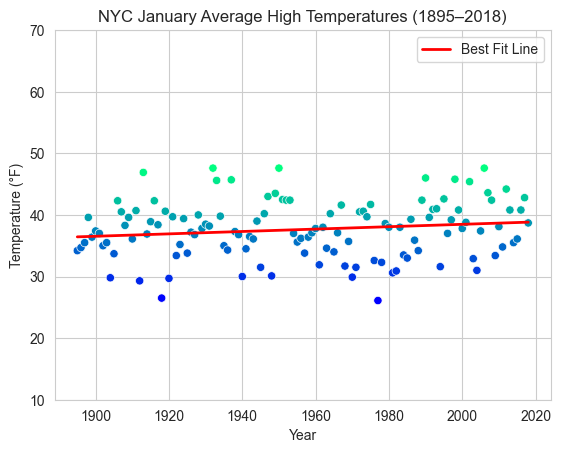

In [87]:
# Create a scatter plot of the dataset
axes = sns.scatterplot(
    data=nyc_df, 
    x='Date', 
    y='Temperature', 
    hue='Temperature', 
    palette='winter', 
    legend=False
)

# Set plot limits and labels
axes.set_ylim(10, 70)
axes.set_title('NYC January Average High Temperatures (1895–2018)')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (°F)')

# Add the regression line
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = linear_regression.coef_ * x + linear_regression.intercept_
plt.plot(x, y, color='red', linewidth=2, label='Best Fit Line')

# Add a legend and show the plot
plt.legend()
plt.show()

## Part 4 - Insights
Compare SciPy vs scikit-learn approaches here. Discuss differences in slope, predictions, and workflow.

### SciPy Regression (Part 2)
The regression analysis using **SciPy’s `linregress`** function shows a gradual upward trend in NYC January average high temperatures.

- **Slope:** 0.01477  
  Indicates the average high temperature has increased roughly 0.015°F per year.  
- **Intercept:** 8.69  
  The y-intercept of the regression line; not directly meaningful in real-world terms but part of the linear equation.  
- **Predicted 2024 Temperature:** 38.59°F  
  Suggests the warming trend continues modestly upward.

### scikit-learn Regression (Part 3)
Using **scikit-learn’s `LinearRegression`** class with a train-test split:

- **Coefficient:** 0.01939  
  Shows a slightly steeper yearly increase than the SciPy slope.  
- **Intercept:** -0.31  
- **Predicted 1890 Temperature:** 36.34°F  
- **Predicted 2024 Temperature:** 38.94°F  

The predictions are very close to the SciPy model but slightly higher for 2024, reflecting minor differences in calculation and data handling in the scikit-learn fit.

### Comparison and Reflection
- Both models demonstrate a long-term warming trend in NYC January average high temperatures.  
- The scikit-learn model allows for **train/test splitting**, which is useful for more advanced machine learning workflows, while SciPy provides a simple and quick statistical regression.  
- Using both approaches helped reinforce understanding of **linear relationships, slope/intercept interpretation, and predictive modeling**.  

Overall, this exercise highlights how different regression methods can produce similar but slightly different results, and underscores the importance of **clear data preparation and model interpretation** in data analytics.



